In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils import *
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import os

In [2]:
files = os.listdir('../data/out')
model_names = set(["_".join(f.split("_")[0:-1]) for f in files])

In [ ]:
for name in model_names:
    train_df = pd.read_csv(f'../data/out/{name}_train.csv').set_index('week_start')
    test_df = pd.read_csv(f'../data/out/{name}_test.csv').set_index('week_start')
    # Create and train SARIMAX model
    print(f"training {name} model")
    model = SARIMAX(train_df["count"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
    model_fit = model.fit()
    joblib.dump(model_fit, f'../models/sarimax_{name}.joblib')
    # Print model summary
    print(model_fit.summary())
    # Make predictions
    print(f"Predicting {name} model")
    test_predictions = model_fit.predict(start=test_df.index[0], end=test_df.index[-1], dynamic=False)
    test_df['y_pred'] = test_predictions
    test_df.to_csv(f'../data/predictions/sarimax_{name}.csv')
    break

In [ ]:
# Make predictions on the test set

mse = mean_squared_error(test_df["count"], test_predictions)
r2 = r2_score(test_df["count"], test_predictions)
print(f'Mean Squared Error: {mse}')
print(f'R^2: {r2}')

Mean Squared Error: 820078.5711748843
R^2: 0.36451401292939767


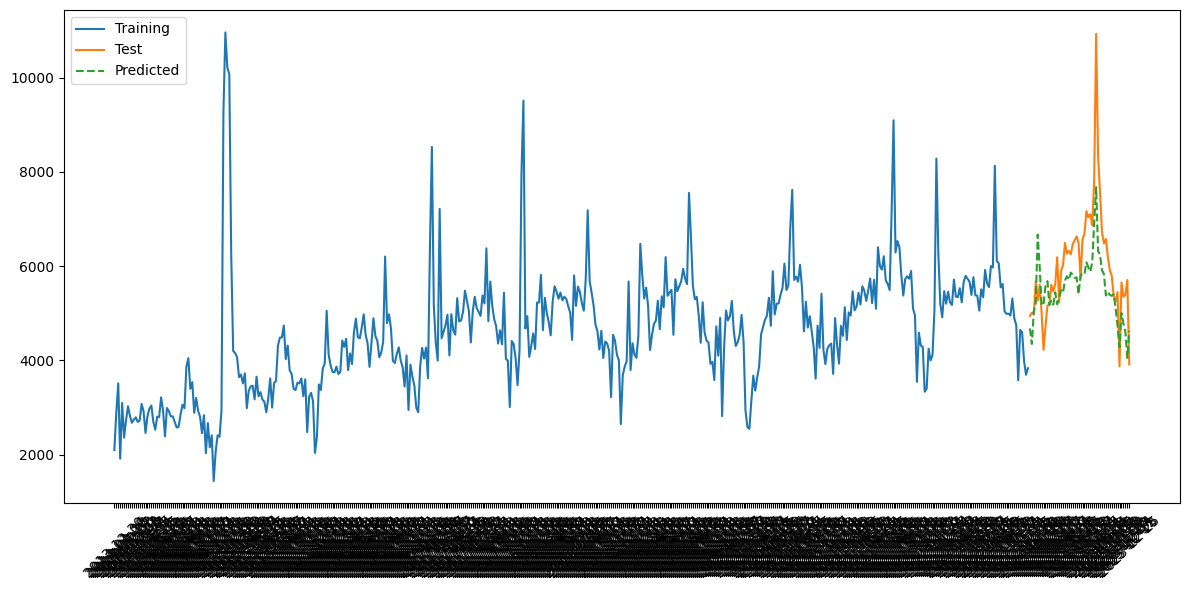

In [35]:
plt.figure(figsize=(12, 6))

# Plot actual vs predicted counts
plt.plot(train_df.index, train_df["count"], label="Training")
plt.plot(test_df.index, test_df["count"], label="Test")
plt.plot(test_df.index, test_predictions, label="Predicted", linestyle="--")

plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()